# Jupyter Notebook: Temperaturvorhersage

## Daten Laden
Als erstes laden wir die Datei (jährliche Durchschnittstemperaturen) aus der Datei 'regional_averages_tm_year.txt' und geben die Titelzeile aus damit wir wissen, dass wir die korrekte Datei lesen.

<div class="alert alert-info">

**Wichtig:** Die zu lesende Datei muss sich in demselben Verzeichnis befinden wie das Jupyter Notebook!

Falls dies nicht der Fall ist muss die Datei in dasselbe Verzeichnis kopiert oder ein absoluter Pfad angegeben werden. Ein absoluter Pfad wäre zum Beispiel: 'C:/Downloads/regional_averages_tm_year.txt' anstatt 'regional_averages_tm_year.txt'.

</div>

Wir wollen wie beim letzten Mal, die Jahreszahlen und Temperaturen aus der Datei lesen. Diesmal beschränken wir uns auf die Temperatur in Berlin.

In [43]:
import csv
jahr = []
temperaturBerlin = []
with open('regional_averages_tm_year.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=';')
    title = next(readCSV, None)  # returns title
    headers = next(readCSV, None)  # returns headers
    if headers:
        print(headers[1:3])
    for row in readCSV:        
        jahr.append(int(row[0]))
        temperaturBerlin.append(float(row[3]))

['Jahr', 'Brandenburg/Berlin']


Dieses Mal geben wir uns nicht mit einfachen Arrays zufrieden. Stattdessen speichern wir die Daten in einem DataFrame. Zuletzt geben wir die ersten Werte in dem DataFrame aus.

<div class="alert alert-info">

**Wichtig:** Wir benötigen die Bibliotheken pandas und numpy.
    
Falls noch nicht geschehen, führe die Befehle 'pip install pandas' und 'pip install numpy' aus.

</div>

In [44]:
import pandas as pd
import numpy as np

x = jahr
y = temperaturBerlin

df = pd.DataFrame(
    {'x': x,
     'y': y}
)

df.head()

,x,y
0,1881,7.54
1,1882,8.97
2,1883,8.41
3,1884,9.10
4,1885,8.39


## TODO: Berechne lineare Regression
...

### manuell
Berechnung Mittelwert, Varianz von x + Covarianz von x und y, Parameter a und b

In [58]:
xmean = np.mean(x)
ymean = np.mean(y)

df['xycov'] = (df['x'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['x'] - xmean)**2

b = df['xycov'].sum() / df['xvar'].sum()
a = ymean - (b * xmean)
print(f'a = {a}')
print(f'b = {b}')

a = -10.61641315519013
b = 0.009955806783144913


### Ausgabe Ergebnisse
...

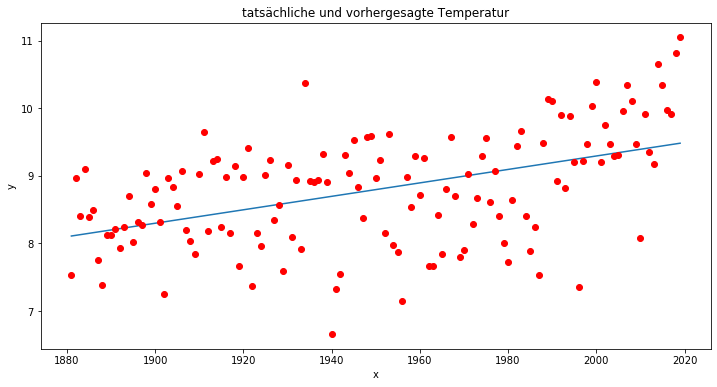

In [59]:
ypred = b*df['x'] + a

from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(x, ypred)     # regression line
plt.plot(x, y, 'ro')   # scatter plot showing actual data
plt.title('tatsächliche und vorhergesagte Temperatur')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

### mithilfe von scikit-learn
Modell initialisieren, fitten, auswerten
Achtung: Modell benötigte matrix input!

In [56]:
from sklearn.linear_model import LinearRegression

X = np.array(jahr).reshape(-1, 1)
y = np.array(temperaturBerlin)

lm = LinearRegression()
model = lm.fit(X, y)

print(f'a = {model.intercept_}')
print(f'b = {model.coef_}')

a = -10.61641315519013
b = [0.00995581]


In [57]:
model.predict([[2060]])

array([9.89254882])